In [664]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [665]:
import numpy as np
import pandas as pd

In [666]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [667]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
from sqlalchemy import inspect, func 
from sqlalchemy.ext.declarative import declarative_base
from pandas import DataFrame
from flask import Flask, jsonify


In [668]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [669]:
# reflect an existing database into a new model
Base = automap_base()


In [670]:

# reflect the tables
Base.prepare(engine, reflect=True)


In [671]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [672]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [673]:
# Create our session (link) from Python to the DB
session=Session(bind=engine)

In [674]:
#Start and End Dates
trip_start_date = '2017-04-10'
trip_end_date = '2017-04-20'

In [675]:
#Create Flask
app = Flask(__name__)

###### Exploratory Climate Analysis

In [678]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()
prcp_data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [635]:
df = pd.DataFrame(prcp_data)
df.set_index('date', inplace=True)
df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


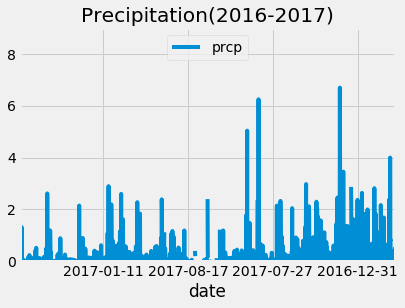

In [636]:
df.plot(title="Precipitation(2016-2017)")
plt.legend(loc="upper center")
plt.ylim(0,9)
plt.xlim(9)
plt.show()

In [637]:
# Calculate the date 1 year ago from the last data point in the database
year_ago= dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [651]:
# Perform a query to retrieve the data and precipitation scores

date_prcp = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date>=year_ago).all()
date_prcp

[(0.0, '2016-08-23'),
 (0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-1

In [652]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_prcp, columns=['prcp','date'])
df.set_index('date', inplace=True)
df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [653]:
# Sort the dataframe by date
df=df.sort_values(by=['date'], ascending = True)
df.reset_index()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


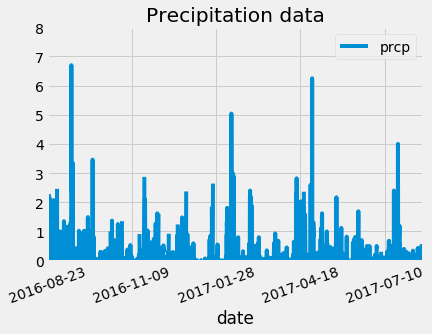

In [654]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(title="Precipitation data")
plt.legend(loc="upper right")
plt.ylim(0,8)
degrees = 20
plt.xticks(rotation=degrees)
plt.show()

In [655]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [656]:
# Design a query to show how many stations are available in this dataset?
Stations = session.query(station)

Stations.count()

9

In [659]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc())
for row in station_activity:
    print(row)
    
 

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [660]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active_station = station_activity[0][0]
most_active_station

temp_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [661]:
# Choose the station with the highest number of temperature observations.

highest_temp_obs = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
highest_temp_obs = highest_temp_obs [0]
highest_temp_obs

'USC00519281'

In [662]:
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

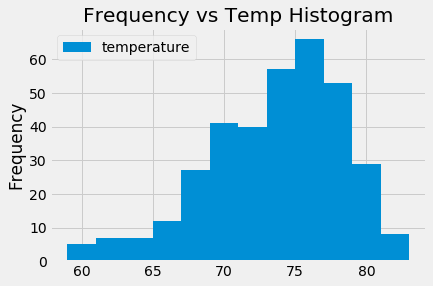

In [663]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempstats_12months = session.query(Measurement.tobs).filter(Measurement.date>=year_ago).filter(Measurement.station == highest_temp_obs).all()

temperature_observation = pd.DataFrame(tempstats_12months, columns=["temperature"])

temperature_observation.plot.hist(bins=12, title = "Frequency vs Temp Histogram")
plt.show()

## Bonus Challenge Assignment

In [559]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

None


In [560]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [561]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
